<a href="https://colab.research.google.com/github/micaellimaj/series_temporais/blob/main/EstoqueDoGoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estoque do Google

## Introdução

https://www.kaggle.com/datasets/alirezajavid1999/google-stock-2010-2023?select=Google_Stock_Test+%282023%29.csv

## Pré-Processamento dos dados

In [ ]:
# bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('Google_Stock_Test (2023).csv')

Vamos vizualizar o conjunto de dados.

In [ ]:
# 5 primeiros
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [ ]:
# 5 últimos
dados.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100
142,2023-07-28,130.779999,133.740005,130.570007,132.580002,132.580002,36572900


Agora vamos verificar se os dados posuem valores nulos.

In [ ]:
valores_nulos = dados.isnull().values.any()

if valores_nulos:
  print('Há valores nulos na tabela!')
else:
  print('Não há valores nulos na tabela.')

Não há valores nulos na tabela.


Vamos conhecer melhor o conjunto de dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       143 non-null    object 
 1   Open       143 non-null    float64
 2   High       143 non-null    float64
 3   Low        143 non-null    float64
 4   Close      143 non-null    float64
 5   Adj Close  143 non-null    float64
 6   Volume     143 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
dados.shape

(143, 7)

In [ ]:
dados.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dados.index

RangeIndex(start=0, stop=143, step=1)

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,143.0,1.074613e+02,1.270458e+01,8.598000e+01,9.551000e+01,1.054700e+02,1.206900e+02,1.316700e+02
High,143.0,1.090366e+02,1.279908e+01,8.757000e+01,9.762500e+01,1.066900e+02,1.223050e+02,1.337400e+02
Low,143.0,1.063517e+02,1.261059e+01,8.486000e+01,9.449500e+01,1.041100e+02,1.193150e+02,1.305700e+02
Close,143.0,1.077822e+02,1.262081e+01,8.620000e+01,9.652500e+01,1.054100e+02,1.206950e+02,1.325800e+02
Adj Close,143.0,1.077822e+02,1.262081e+01,8.620000e+01,9.652500e+01,1.054100e+02,1.206950e+02,1.325800e+02
Volume,143.0,3.669292e+07,1.415642e+07,1.446790e+07,2.770280e+07,3.326680e+07,4.093580e+07,1.194550e+08


In [ ]:
dados["Date"].describe().T

count            143
unique           143
top       2023-01-03
freq               1
Name: Date, dtype: object

## Visualização dos dados

**GRÁFICO DE BARRAS**

In [ ]:
valor_abertura = dados[["Date","Open"]].groupby("Date").agg("sum").reset_index()
valor_abertura.head()

,Date,Open
0,2023-01-03,89.589996
1,2023-01-04,90.349998
2,2023-01-05,87.470001
3,2023-01-06,86.790001
4,2023-01-09,88.360001


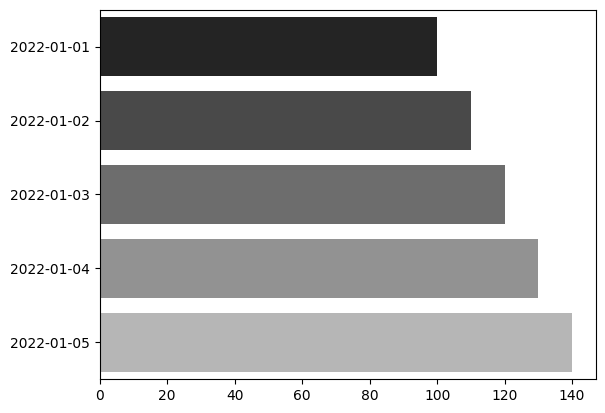

In [ ]:
palette = sns.color_palette("gray", as_cmap=False)
grafico = sns.barplot(data=valor_abertura, x='Open',y='Date', palette=palette, errorbar=None)
plt.show()